# Rot-net

### Author : Sohaib Anwaar
Rot-net is an idea to predict the rotation of anything your want it may be faces, text, cards papers etc I created this rotnet to rotate cards. 



X Train shape  (16, 224, 224, 3)


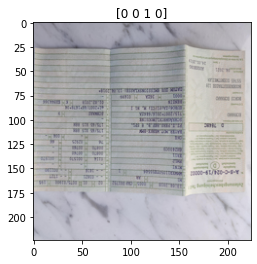

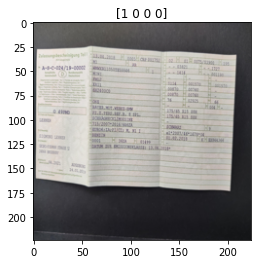

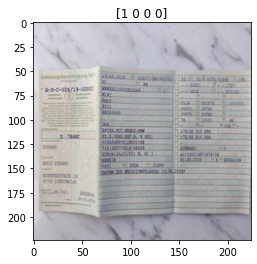

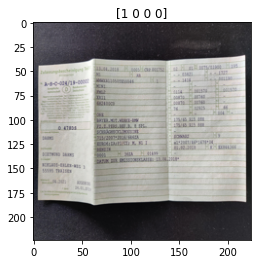

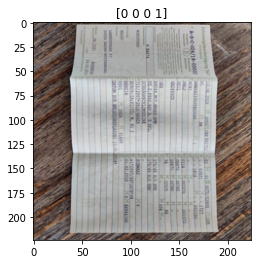

In [28]:
import os, sys, glob, random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

sys.path.append(os.path.abspath('').rsplit("\\",1)[0])
from utils import data_gen


            

# Images path on which you want to train your model
IMAGES_PATH = "\\Users\\Public\\Documents\\OCR\\OCR\\images\\*.*g"
imgs_list   = glob.glob(IMAGES_PATH)
ANGLES      = [0, 90, 180, 270]

# Initilizing Generators
train_gen = data_gen(imgs_list, batch_size = 16, angles = ANGLES)
val_gen   = data_gen(imgs_list, batch_size = 16, angles = ANGLES)
X_train, Y_train = next(val_gen)
print("X Train shape ",X_train.shape)

# Ploting Images
for index,i in enumerate(X_train[:5]):
    plt.title(Y_train[index])
    plt.imshow(i)
    plt.show()

# Model Artitecture

In [29]:
# Name of the model
SAVE_WEIGHTS = "./models/" 
MODEL_NAME   = 'rotnet_mnist_{val_loss}'

# Making Directory if not exixts
if not os.path.exists(SAVE_WEIGHTS):
    os.makedirs(SAVE_WEIGHTS)


# I am using mobile-net layers and adding few more layers at the bottom of the artitecture.
mobile_net = tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    
)

# Adding few layers at the bottom
x = tf.keras.layers.GlobalAveragePooling2D()(mobile_net.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(NB_CLASSES, activation='softmax', name = "output")(x)
model = tf.keras.models.Model(inputs=mobile_net.input, outputs=x)
model.summary()

# model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# callbacks
checkpointer = ModelCheckpoint(
    filepath=os.path.join(SAVE_WEIGHTS, MODEL_NAME  + '.hdf5'),
    save_best_only=True
)
early_stopping = EarlyStopping(patience=100)
tensorboard = TensorBoard()



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

# Training

In [30]:
# training parameters
BATCH_SIZE = 2
NB_EPOCHS  = 50
NB_CLASSES = len(ANGLES)
NB_TRAINING_SAMPLES = len(imgs_list)

MODEL_PATH = "models/rotnet_mnist_0.01311238668859005.hdf5"
model      = load_model(
    MODEL_PATH, custom_objects=None, compile=True, options=None
)

model.fit_generator(
    train_gen,
    steps_per_epoch=NB_TRAINING_SAMPLES // BATCH_SIZE,
    epochs=NB_EPOCHS,
    validation_data=val_gen,
    validation_steps=NB_TRAINING_SAMPLES // BATCH_SIZE,
    verbose=1,
    callbacks=[checkpointer, early_stopping, tensorboard]
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
 1/25 [>.............................] - ETA: 0s - loss: 0.6823 - accuracy: 0.8125WARNING:tensorflow:From c:\users\gng\anaconda3\envs\tgpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
25/25 [==============================] - 101s 4s/step - loss: 0.1092 - accuracy: 0.9700 - val_loss: 0.0325 - val_accuracy: 0.9875
Epoch 2/50
25/25 [==============================] - 107s 4s/step - loss: 0.0101 - accuracy: 0.9950 - val_loss: 0.0509 - val_accuracy: 0.9950
Epoch 3/50
25/25 [==============================] - 103s 4s/step - loss: 0.0152 - accuracy: 0.9975 - val_loss: 4.3038e-05 - val_accuracy: 1.0000
Epoch 4/50
25/25 [==============================] - 100s 4s/step - loss: 5.7144e-04 - accuracy: 1.0000 - val_loss: 9.6329e-06

KeyboardInterrupt: 

# Inference

Total Images to predict 51


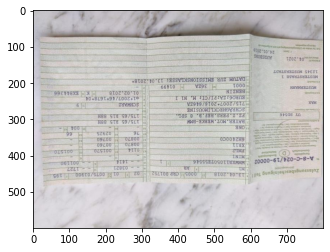

180


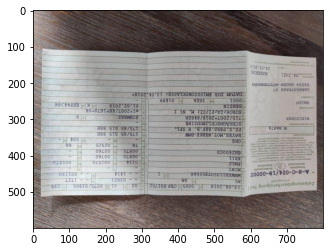

180


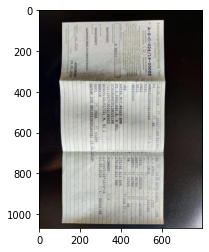

180


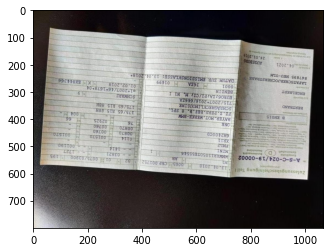

180


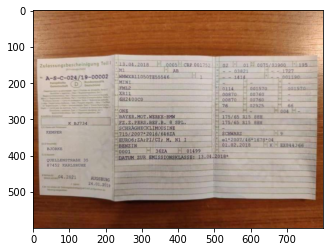

180


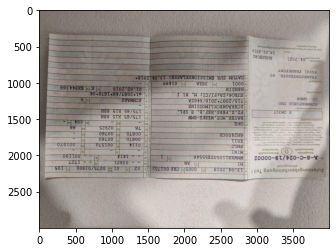

180


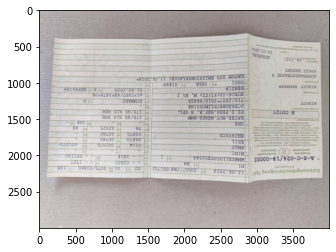

180


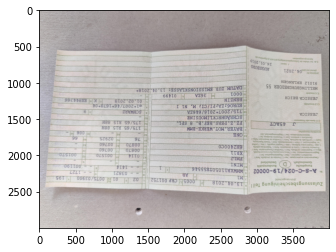

180


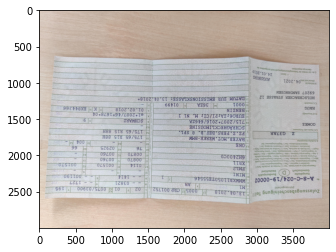

180


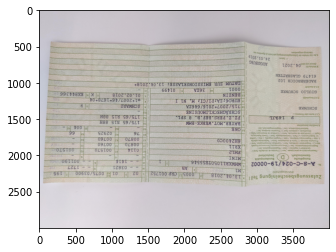

180


KeyboardInterrupt: 

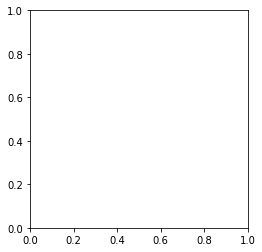

In [21]:
# training loop
from tensorflow.keras.models import load_model
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np

# Loading Model
MODEL_PATH = "models/rotnet_mnist_0.01311238668859005.hdf5"
MODEL      = load_model(
    MODEL_PATH, custom_objects=None, compile=True, options=None
)

# Inference variables
LABELS     = [0,90,180, 270]
images     = "C:\\Users\\Public\\Documents\\OCR\\OCR\\images\\"
images_list= glob.glob(images+"*.*g")

print(f"Total Images to predict {len(images_list)}")

for image_path in images_list:
    image      = Image.open(image_path).convert("RGB").rotate(180,expand=True)
    plt.imshow(image)
    plt.show()
    # preprocessing
    np_array = np.expand_dims(np.asarray(image.resize((224,224))), axis = 0)
    prediction = np.argmax(MODEL.predict(np_array))
    # Prediction
    print(LABELS[prediction])

In [24]:
images     = "C:\\Users\\Public\\Documents\\OCR\\OCR\\images\\13.jpg"
image      = Image.open(images).convert("RGB").rotate(180,expand=True).save(images)